# Libraries

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Setting CometML
<img src='https://camo.githubusercontent.com/b35adf34bc440ea2ac19bb0d3432f48e26d71ab8e4c256e936b709eec44f5b19/68747470733a2f2f7777772e636f6d65742e6d6c2f696d616765732f6c6f676f5f636f6d65745f6c696768742e706e67' width=500px>

In [2]:
from comet_ml import Experiment

In [3]:
# Creating an experiment

experiment = Experiment(api_key = '2ZlKWCvoe3rTUNPPPRpjc8C19',
                       project_name = 'sf-medical-appointment',
                       workspace = 'nataliamantyk')

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git repository in '/Users/nataliakonovalova/Documents/SKILLFACTORY/EDA-6_Design the Experiment' nor in any parent directory. You can override where Comet is looking for a Git Patch by setting the configuration `COMET_GIT_DIRECTORY`
COMET INFO: Experiment is live on comet.com https://www.comet.com/nataliamantyk/sf-medical-appointment/1c16d4549ed8481a9f59e16051376988



# Data

In [4]:
data = pd.read_csv('data/KaggleV2-May-2016.csv.zip', compression = 'zip')
display(data.head())
display(data.info())

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


None

# Visualization

### Distribution of numerical features

{'web': 'https://www.comet.com/api/image/download?imageId=c648e5333f914952bda3bc227b6127e4&experimentKey=1c16d4549ed8481a9f59e16051376988',
 'api': 'https://www.comet.com/api/rest/v1/image/get-image?imageId=c648e5333f914952bda3bc227b6127e4&experimentKey=1c16d4549ed8481a9f59e16051376988',
 'imageId': 'c648e5333f914952bda3bc227b6127e4'}

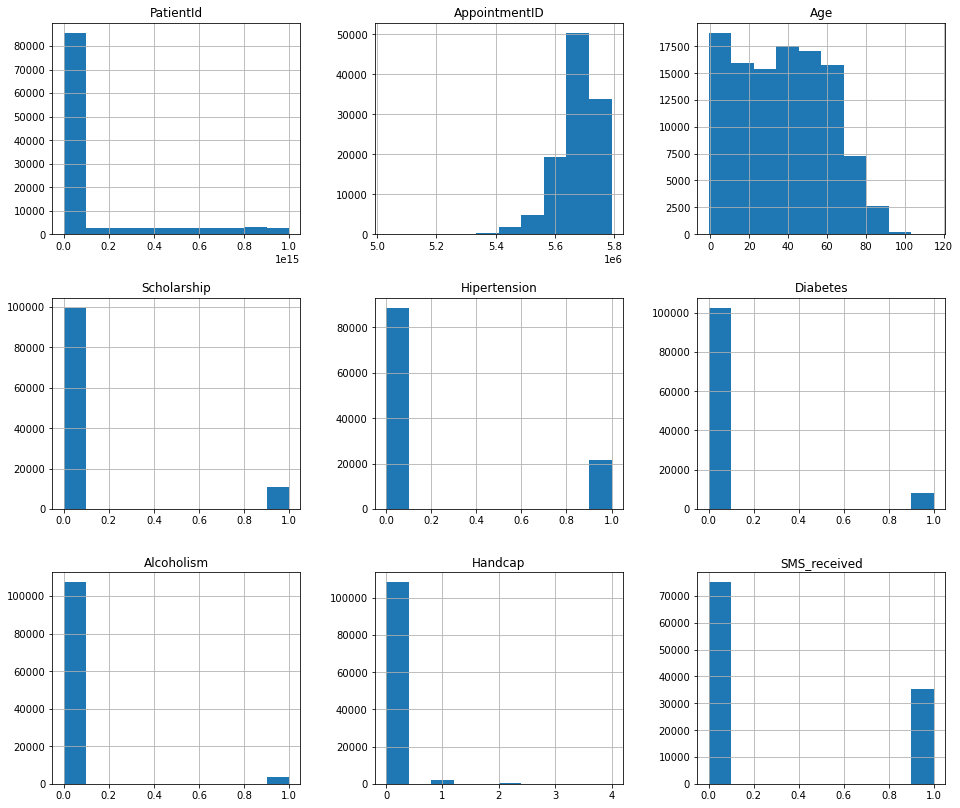

In [5]:
data.hist(figsize = (16,14))
experiment.log_figure(figure = plt)

In [6]:
print("Unique values in column 'Age' => {}".format(data.Age.unique()))

Unique values in column 'Age' => [ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7   0   3   1  69  68  60  67  36  10  35  20
  26  34  33  16  42   5  47  17  41  44  37  24  66  77  81  70  53  75
  73  52  74  43  89  57  14   9  48  83  72  25  80  87  88  84  82  90
  94  86  91  98  92  96  93  95  97 102 115 100  99  -1]


In [7]:
# Delete abnormal values

data = data[(data.Age >= 0) & (data.Age <= 110)]
data.Age.value_counts()

0      3539
1      2273
52     1746
49     1652
53     1651
       ... 
97       11
98        6
100       4
102       2
99        1
Name: Age, Length: 102, dtype: int64

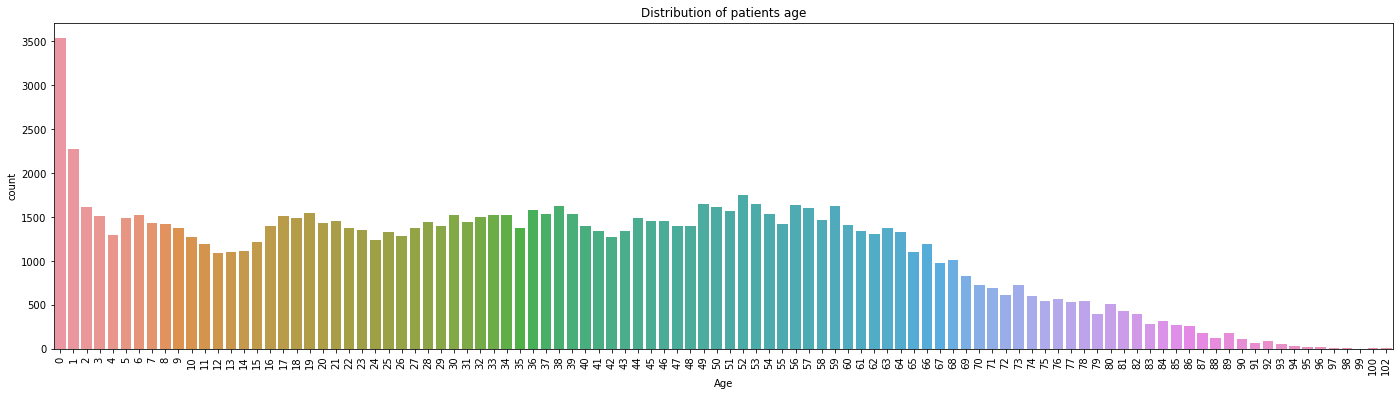

In [8]:
plt.figure(figsize = (24, 6))
plt.xticks(rotation = 90)
ax = sns.countplot(x = data.Age)
ax.set_title('Distribution of patients age')
experiment.log_figure(figure = plt)
plt.show()

# Will a patient attend an appointment?

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110521 non-null  float64
 1   AppointmentID   110521 non-null  int64  
 2   Gender          110521 non-null  object 
 3   ScheduledDay    110521 non-null  object 
 4   AppointmentDay  110521 non-null  object 
 5   Age             110521 non-null  int64  
 6   Neighbourhood   110521 non-null  object 
 7   Scholarship     110521 non-null  int64  
 8   Hipertension    110521 non-null  int64  
 9   Diabetes        110521 non-null  int64  
 10  Alcoholism      110521 non-null  int64  
 11  Handcap         110521 non-null  int64  
 12  SMS_received    110521 non-null  int64  
 13  No-show         110521 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 16.7+ MB


# Coding of categorical features

In [10]:
categorical_columns_names = ['Gender', 'Neighbourhood']
encoded_columns = pd.get_dummies(data, columns = categorical_columns_names)

In [11]:
encoded_columns.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 
                     'AppointmentDay', 'No-show'], axis = 1, inplace = True)

In [12]:
encoded_columns.head()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Gender_F,Gender_M,Neighbourhood_AEROPORTO,...,Neighbourhood_SANTOS REIS,Neighbourhood_SEGURANÇA DO LAR,Neighbourhood_SOLON BORGES,Neighbourhood_SÃO BENEDITO,Neighbourhood_SÃO CRISTÓVÃO,Neighbourhood_SÃO JOSÉ,Neighbourhood_SÃO PEDRO,Neighbourhood_TABUAZEIRO,Neighbourhood_UNIVERSITÁRIO,Neighbourhood_VILA RUBIM
0,62,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,56,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,62,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,56,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
y = data['No-show']
display(y)

0         No
1         No
2         No
3         No
4         No
          ..
110522    No
110523    No
110524    No
110525    No
110526    No
Name: No-show, Length: 110521, dtype: object

In [14]:
y = y.replace({'No': 0, 'Yes': 1})

In [15]:
y.value_counts(True)

0    0.798084
1    0.201916
Name: No-show, dtype: float64

# Scaler of Data

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(encoded_columns)
print(X.shape)

(110521, 90)


# Modeling

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### Model initialization

In [18]:
logreg = LogisticRegression()
random_state = 42

### Model training

In [19]:
logreg.fit(X, y)

/Applications/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### Logging the training parameters

In [20]:
params = {'random_state':random_state,
         'model_type':'logreg'}
experiment.log_parameters(params)

### Model predictions

In [21]:
y_pred = logreg.predict(X)

### Model analysis

In [22]:
accuracy = accuracy_score(y, y_pred)
print('Percentage of correct answers: {:6.3F}'.format(accuracy))

Percentage of correct answers:  0.798


# Metrics logging

In [23]:
metrics = {'accuracy' : accuracy}

In [24]:
experiment.log_metrics(metrics)

In [25]:
experiment.log_confusion_matrix(y.tolist(), y_pred.tolist())

{'web': 'https://www.comet.com/api/asset/download?assetId=e969f0d8c34c456aae837a3b5c3ab3d2&experimentKey=1c16d4549ed8481a9f59e16051376988',
 'api': 'https://www.comet.com/api/rest/v2/experiment/asset/get-asset?assetId=e969f0d8c34c456aae837a3b5c3ab3d2&experimentKey=1c16d4549ed8481a9f59e16051376988',
 'assetId': 'e969f0d8c34c456aae837a3b5c3ab3d2'}

# Home Work

## Correlation

In [26]:
# Data / Features processing
categorical_columns = ['Gender', 'No-show']
corr_columns = pd.get_dummies(data, columns = categorical_columns)

corr_columns.drop(['AppointmentID', 'PatientId', 
                      'ScheduledDay', 'AppointmentDay',
                   'Neighbourhood'], axis=1, inplace = True)

display(corr_columns.head())

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Gender_F,Gender_M,No-show_No,No-show_Yes
0,62,0,1,0,0,0,0,1,0,1,0
1,56,0,0,0,0,0,0,0,1,1,0
2,62,0,0,0,0,0,0,1,0,1,0
3,8,0,0,0,0,0,0,1,0,1,0
4,56,0,1,1,0,0,0,1,0,1,0


In [27]:
corr_columns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   Age           110521 non-null  int64
 1   Scholarship   110521 non-null  int64
 2   Hipertension  110521 non-null  int64
 3   Diabetes      110521 non-null  int64
 4   Alcoholism    110521 non-null  int64
 5   Handcap       110521 non-null  int64
 6   SMS_received  110521 non-null  int64
 7   Gender_F      110521 non-null  uint8
 8   Gender_M      110521 non-null  uint8
 9   No-show_No    110521 non-null  uint8
 10  No-show_Yes   110521 non-null  uint8
dtypes: int64(7), uint8(4)
memory usage: 11.2 MB


In [28]:
round(corr_columns.corr(),2)

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Gender_F,Gender_M,No-show_No,No-show_Yes
Age,1.00,-0.09,0.50,0.29,0.10,0.08,0.01,0.11,-0.11,0.06,-0.06
Scholarship,-0.09,1.00,-0.02,-0.02,0.04,-0.01,0.00,0.11,-0.11,-0.03,0.03
Hipertension,0.50,-0.02,1.00,0.43,0.09,0.08,-0.01,0.06,-0.06,0.04,-0.04
Diabetes,0.29,-0.02,0.43,1.00,0.02,0.06,-0.01,0.03,-0.03,0.02,-0.02
Alcoholism,0.10,0.04,0.09,0.02,1.00,0.00,-0.03,-0.11,0.11,0.00,-0.00
Handcap,0.08,-0.01,0.08,0.06,0.00,1.00,-0.02,-0.02,0.02,0.01,-0.01
SMS_received,0.01,0.00,-0.01,-0.01,-0.03,-0.02,1.00,0.05,-0.05,-0.13,0.13
Gender_F,0.11,0.11,0.06,0.03,-0.11,-0.02,0.05,1.00,-1.00,-0.00,0.00
Gender_M,-0.11,-0.11,-0.06,-0.03,0.11,0.02,-0.05,-1.00,1.00,0.00,-0.00
No-show_No,0.06,-0.03,0.04,0.02,0.00,0.01,-0.13,-0.00,0.00,1.00,-1.00


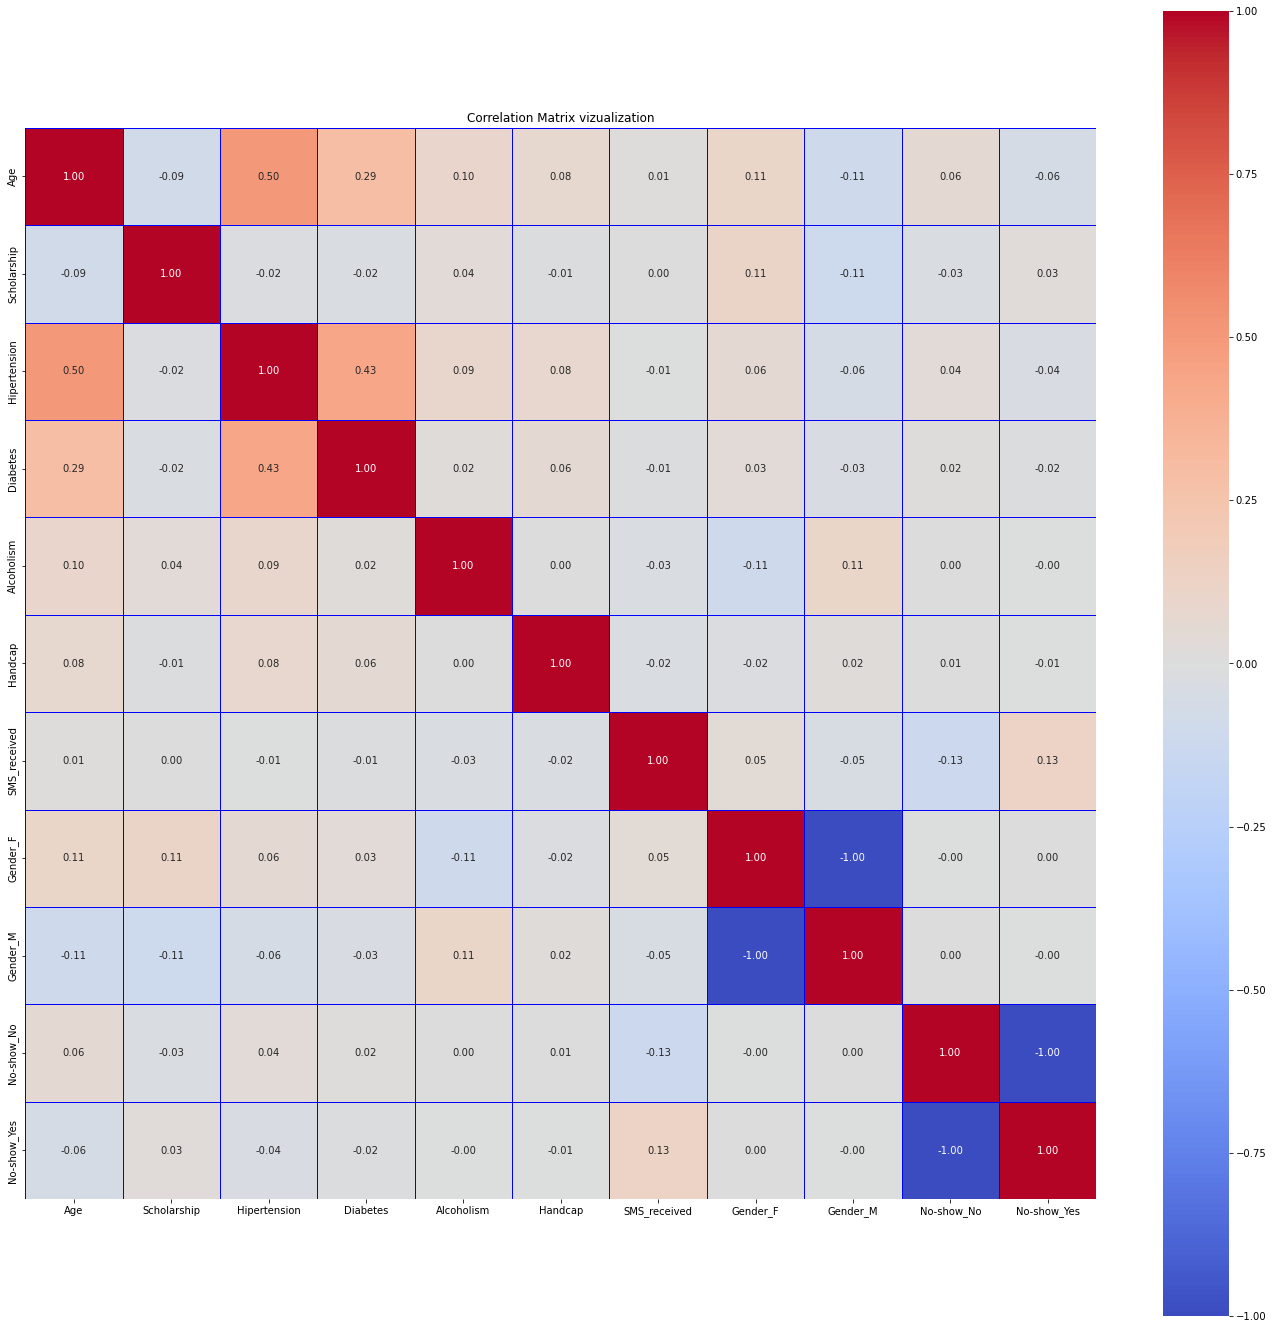

In [29]:
plt.figure(figsize = (24,24))
sns.heatmap(corr_columns.corr(), annot = True, fmt = '.2f',
           cmap = 'coolwarm', linewidths = 1, linecolor = 'blue', 
            square = True)
plt.title('Correlation Matrix vizualization')

experiment.log_figure(figure = plt)
plt.show();

## Pairplot Graph

In [30]:
pairplot_df = data.copy()

In [31]:
pairplot_df['Gender'] = pairplot_df['Gender'].apply(lambda x: 1 if 'F' in x else 0)
pairplot_df['No-show'] = pairplot_df['No-show'].apply(lambda x: 1 if 'Yes' in x else 0)

display(pairplot_df.head())

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,1,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,0,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,1,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,1,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,1,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0


COMET ERROR: Figure number 3 is bigger than the upload limit, 1504549614 > 209715200


<Figure size 1728x1728 with 0 Axes>

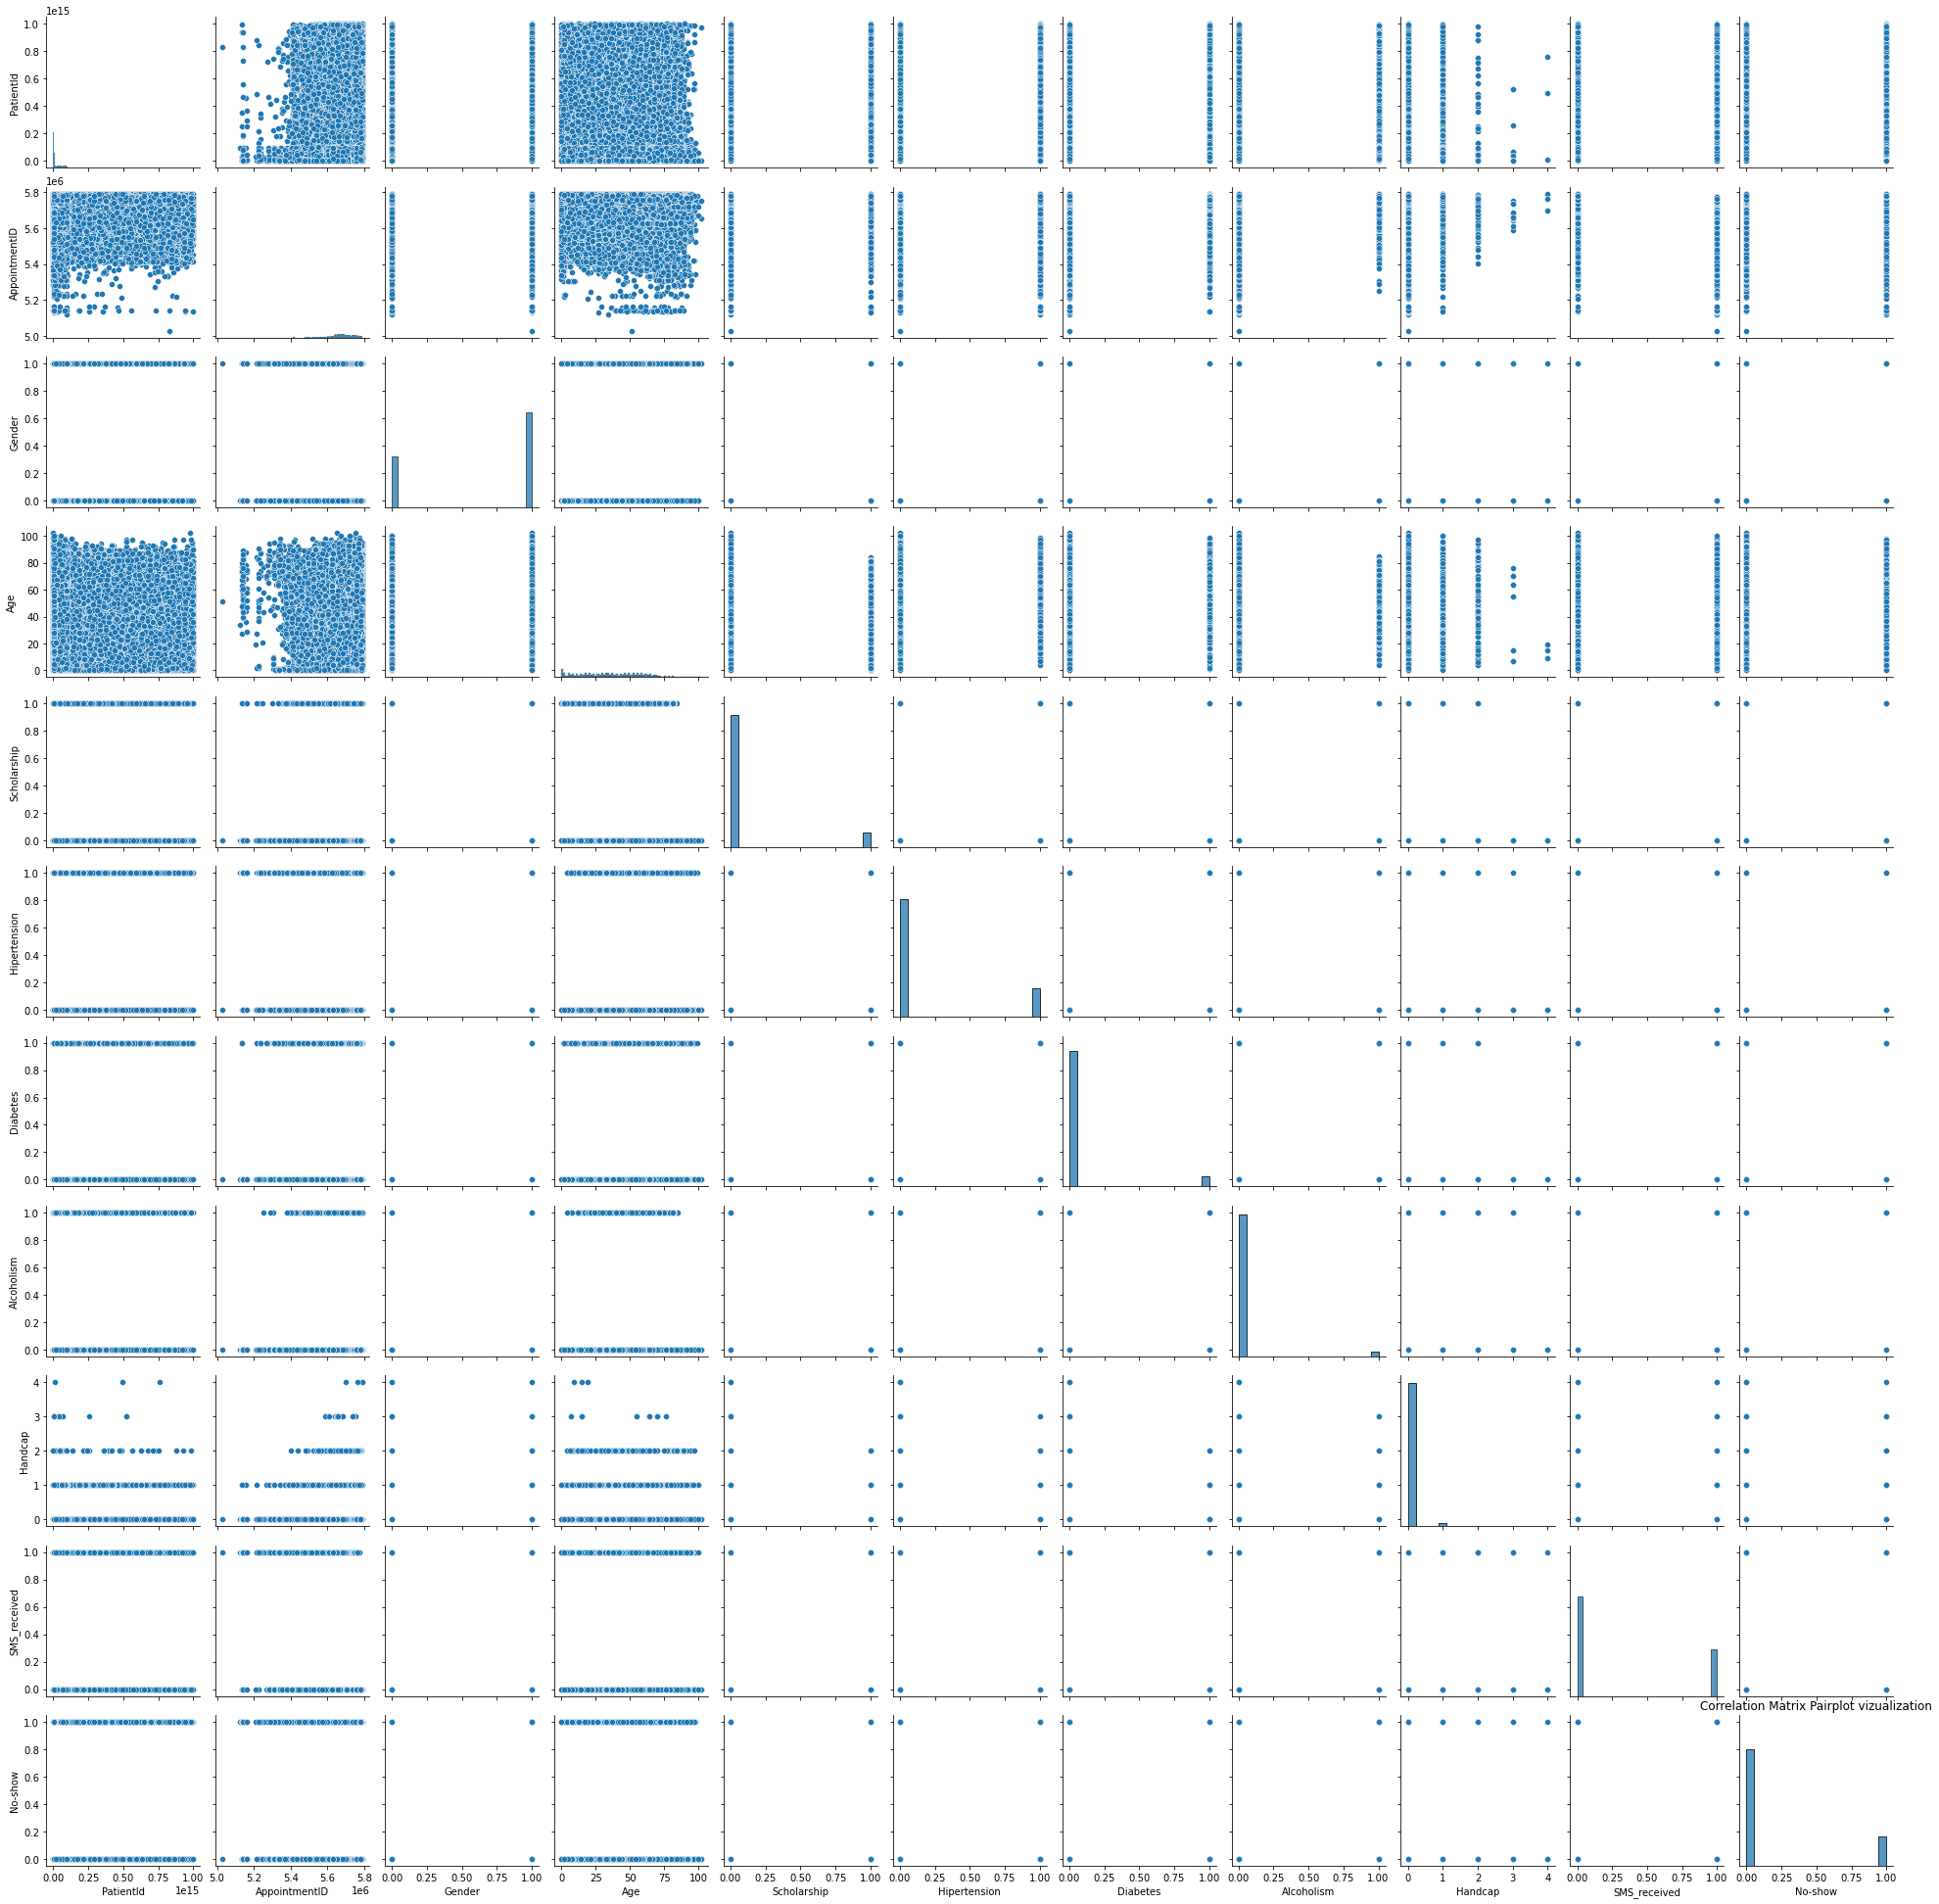

In [32]:
plt.figure(figsize = (24,24))
sns.pairplot(pairplot_df)
plt.title('Correlation Matrix Pairplot vizualization')

experiment.log_figure(figure = plt)
plt.show();

In [33]:
experiment.display()
experiment.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/nataliamantyk/sf-medical-appointment/1c16d4549ed8481a9f59e16051376988
COMET INFO:   Metrics:
COMET INFO:     accuracy : 0.7980836221170637
COMET INFO:   Parameters:
COMET INFO:     C                 : 1.0
COMET INFO:     class_weight      : 1
COMET INFO:     clip              : False
COMET INFO:     copy              : True
COMET INFO:     dual              : False
COMET INFO:     feature_range     : (0, 1)
COMET INFO:     fit_intercept     : True
COMET INFO:     intercept_scaling : 1
COMET INFO:     l1_ratio          : 1
COMET INFO:     max_iter          : 100
COMET INFO:     model_type        : logreg
COMET INFO:     multi_class       : auto
COMET INFO:     n_jobs            : 1
COMET INFO:     penalty           : l2
COMET INFO:     random_stat